<a href="https://colab.research.google.com/github/IAMKK28-03-04/Kushal/blob/main/ASSIGNMENT_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/customers-10000 3.csv')
print(df)

      Index      Customer Id First Name                       Country  \
0         1  EB54EF1154C3A78    Heather                        Norway   
1         2  10dAcafEBbA5FcA   Kristina                       Andorra   
2         3  67DAB15Ebe4BE4a     Briana                         Nepal   
3         4  6d350C5E5eDB4EE      Patty      Northern Mariana Islands   
4         5  5820deAdCF23EFe   Kathleen                         Macao   
...     ...              ...        ...                           ...   
9995   9996  DD0caa06ebf217c     Meghan                 Cote d'Ivoire   
9996   9997  C1C62ff90D0AfED   Jeremiah                       Namibia   
9997   9998  2EfAa6Fe435A7DA      Peggy  United States Virgin Islands   
9998   9999  5dB06C3Fab5CCCb       Evan                         Niger   
9999  10000  9903e8fF4D8Ff0F    Melissa                       Tunisia   

     Subscription Date  no of customer  Founded  
0             26-08-20            3930     1988  
1             27-04-20 

Best hyperparameters: {'C': 0.1, 'penalty': 'l2'}
Best score: 0.02075
Test accuracy: 0.0205
Classification report:
              precision    recall  f1-score   support

        1970       0.01      0.06      0.02        34
        1971       0.00      0.00      0.00        38
        1972       0.00      0.00      0.00        39
        1973       0.00      0.00      0.00        35
        1974       0.00      0.00      0.00        41
        1975       0.00      0.00      0.00        41
        1976       0.00      0.00      0.00        32
        1977       0.00      0.00      0.00        43
        1978       0.00      0.00      0.00        33
        1979       0.00      0.00      0.00        38
        1980       0.00      0.00      0.00        40
        1981       0.00      0.00      0.00        35
        1982       0.00      0.00      0.00        39
        1983       0.00      0.00      0.00        48
        1984       0.02      0.29      0.04        42
        1985       0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


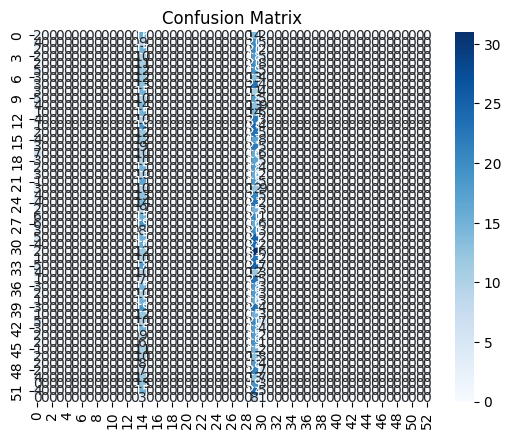

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

df['Founded'] = pd.to_numeric(df['Founded'], errors='coerce')
X = df.drop('Founded', axis=1)
X = X.select_dtypes(include=np.number)
y = df['Founded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2']
}
logreg = LogisticRegression()
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:")
print(classification_report(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00         8
          14       0.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


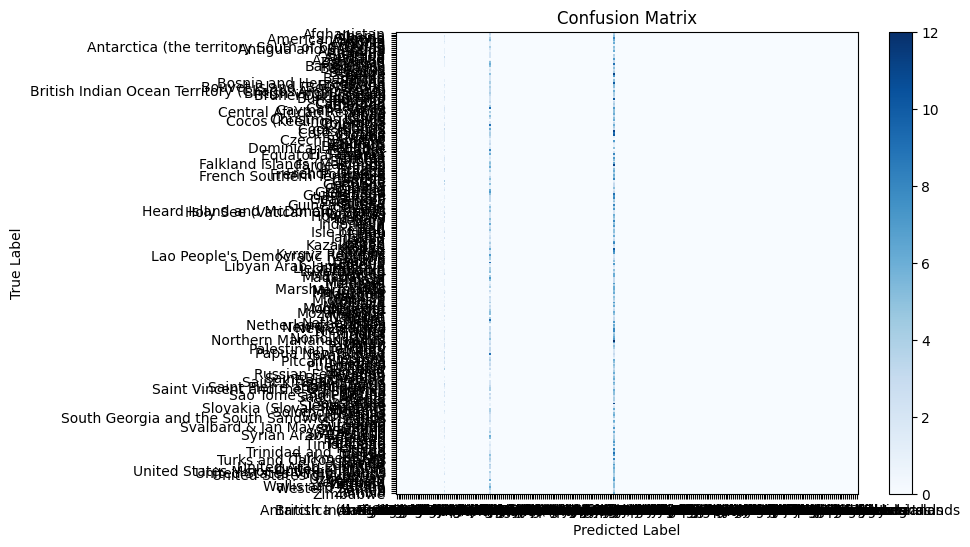

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

data=pd.read_csv('/content/customers-10000 3.csv')

le = LabelEncoder()
data['Country'] = le.fit_transform(data['Country'])

X = data[['no of customer', 'Founded']]
y = data['Country']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

plt.figure(figsize=(8, 6))
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(range(len(le.classes_)), le.classes_)
plt.yticks(range(len(le.classes_)), le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy: 0.0095
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00         8
          14       0.00      0.00      0.00         8
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


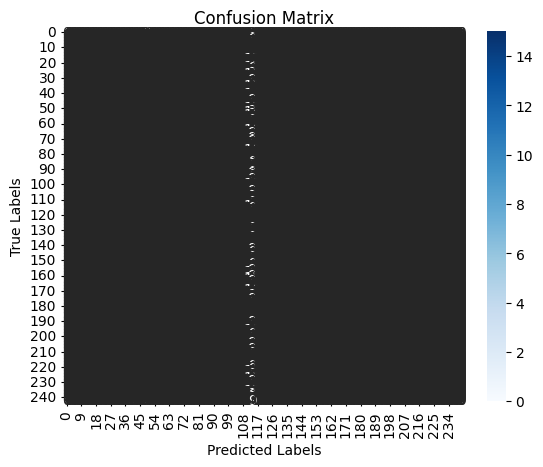

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('/content/customers-10000 3.csv')

le = LabelEncoder()
data['Country'] = le.fit_transform(data['Country'])

X = data[['no of customer', 'Founded']]
y = data['Country']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00         8
          14       0.00      0.00      0.00         8
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         9
   

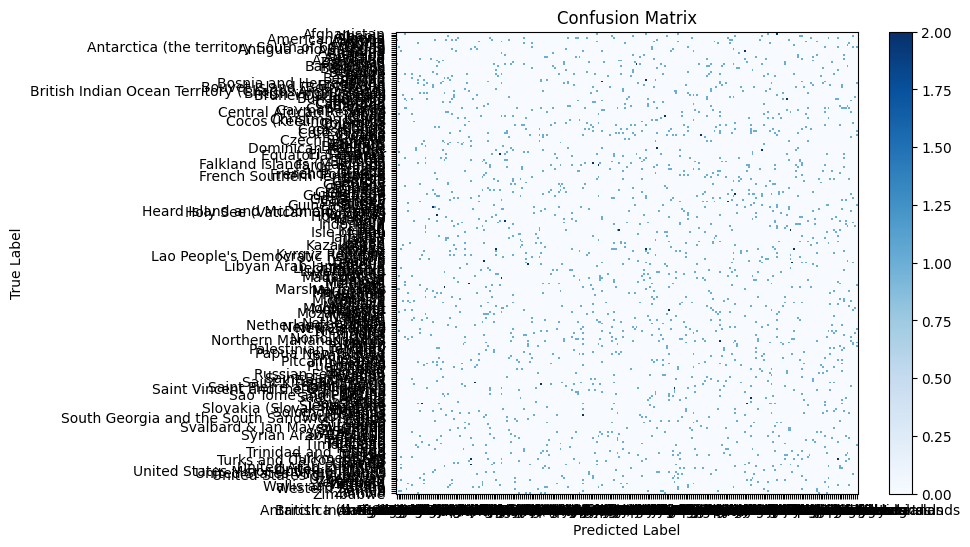

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


data=pd.read_csv('/content/customers-10000 3.csv')

le = LabelEncoder()
data['Country'] = le.fit_transform(data['Country'])

X = data[['no of customer', 'Founded']]
y = data['Country']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

plt.figure(figsize=(8, 6))
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(range(len(le.classes_)), le.classes_)
plt.yticks(range(len(le.classes_)), le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy: 0.004
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00         8
          14       0.00      0.00      0.00         8
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         9
          1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


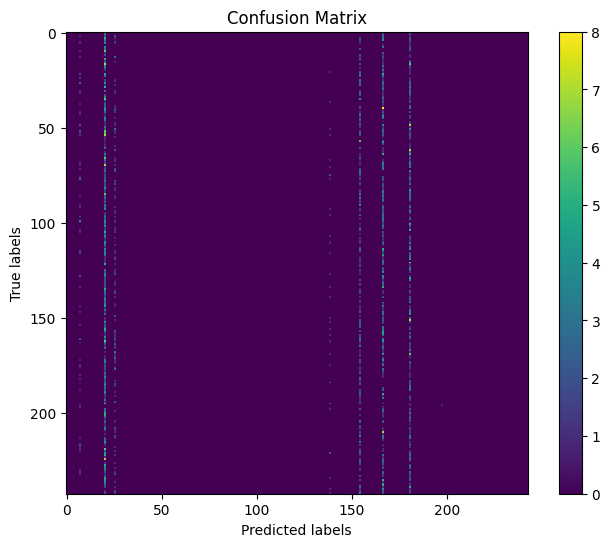

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt

data=pd.read_csv('/content/customers-10000 3.csv')

le = LabelEncoder()
data['Country'] = le.fit_transform(data['Country'])

X = data[['no of customer', 'Founded']]
y = data['Country']

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train, y_train, sample_weight=class_weights[y_train])

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix(y_test, y_pred), interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         9
           3       0.20      0.08      0.11        13
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00         8
          14       0.00      0.00      0.00         8
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         9
   

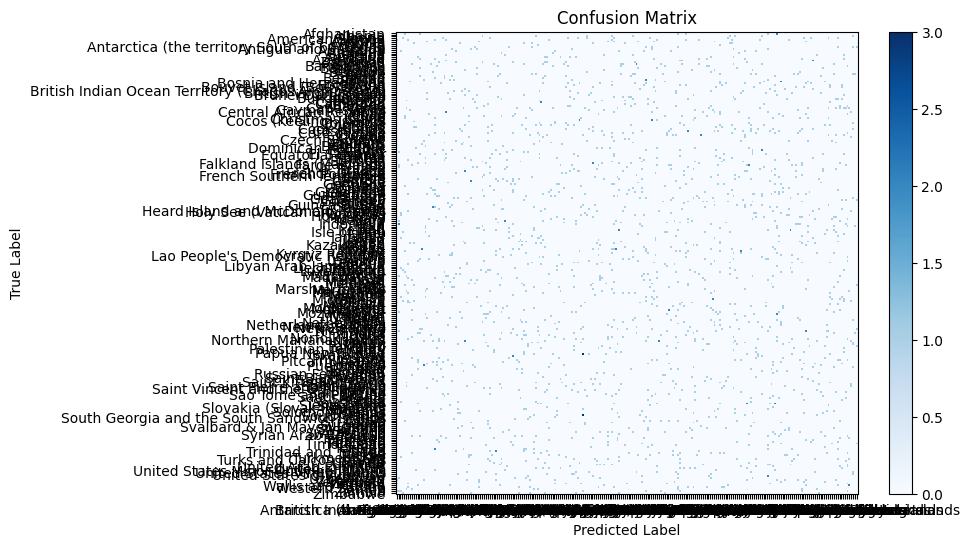

In [ ]:

from sklearn.tree import DecisionTreeClassifier

data=pd.read_csv('/content/customers-10000 3.csv')

data['Country'] = le.fit_transform(data['Country'])

X = data[['no of customer', 'Founded']]
y = data['Country']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

plt.figure(figsize=(8, 6))
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(range(len(le.classes_)), le.classes_)
plt.yticks(range(len(le.classes_)), le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Accuracy: 0.0045
Precision: 0.0063
Recall: 0.0045
F1-score: 0.0050


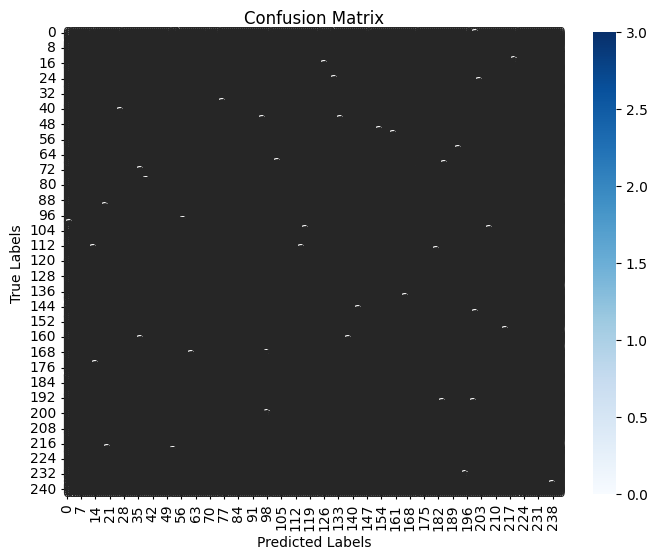

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/population (1).csv')
print(df)

      Country Name Country Code  Year     Value
0            Aruba          ABW  1960     54608
1            Aruba          ABW  1961     55811
2            Aruba          ABW  1962     56682
3            Aruba          ABW  1963     57475
4            Aruba          ABW  1964     58178
...            ...          ...   ...       ...
16395     Zimbabwe          ZWE  2017  14751101
16396     Zimbabwe          ZWE  2018  15052184
16397     Zimbabwe          ZWE  2019  15354608
16398     Zimbabwe          ZWE  2020  15669666
16399     Zimbabwe          ZWE  2021  15993524

[16400 rows x 4 columns]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df.drop(['Value', 'Country Name'], axis=1)
y = df['Value']

le = LabelEncoder()
X['Country Code'] = le.fit_transform(X['Country Code'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:")
print(classification_report(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


KeyboardInterrupt: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.8396
Precision: 0.7050
Recall: 0.8396
F1-score: 0.7664


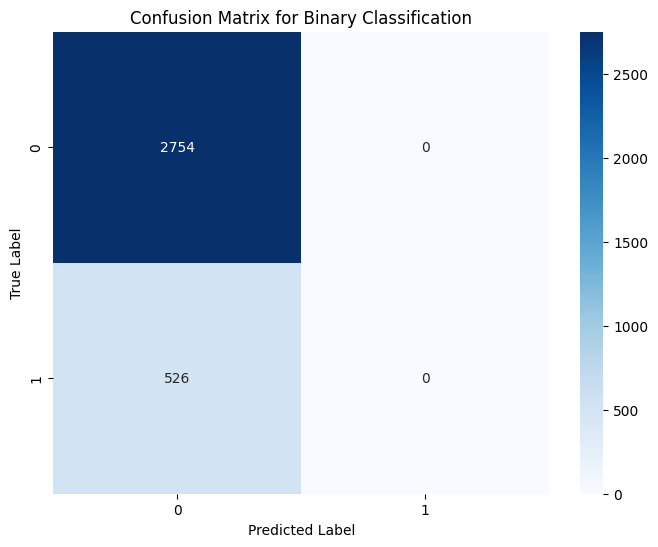

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('/content/population (1).csv')

df['Value'] = df['Value'].apply(lambda x: 1 if x > df['Value'].mean() else 0)

X = df.drop('Value', axis=1)
y = df['Value']

label_encoder = LabelEncoder()

for col in ['Country Name', 'Country Code']:
    X[col] = label_encoder.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Binary Classification")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.0000
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000


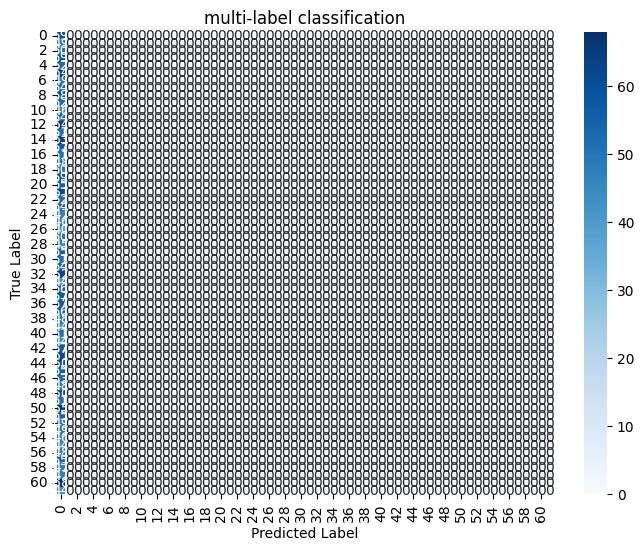

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

df['Year'] = df['Year'].apply(lambda x: [int(i) for i in str(x).replace('[', '').replace(']', '').split(',')])

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['Year'])

X = df.drop('Year', axis=1)
X['Country Name'] = label_encoder.fit_transform(X['Country Name'])
X['Country Code'] = label_encoder.fit_transform(X['Country Code'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("multi-label classification")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.0000
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000


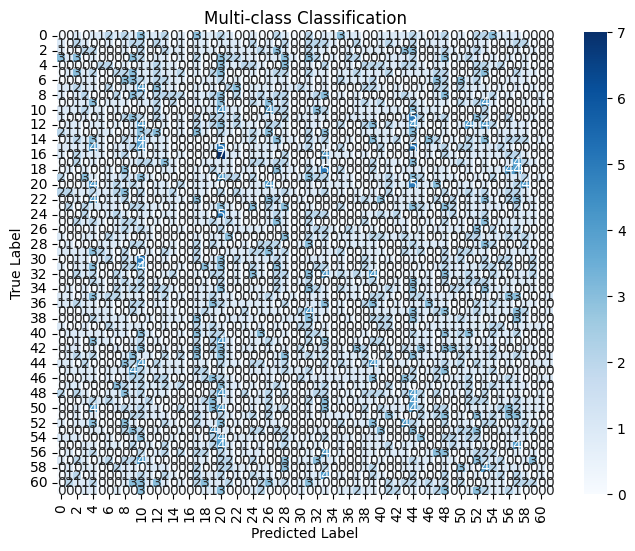

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df['Year'] = df['Year'].astype(str)
df['Year'] = df['Year'].astype('category')

label_encoder = LabelEncoder()
df['Country Name'] = label_encoder.fit_transform(df['Country Name'])
df['Country Code'] = label_encoder.fit_transform(df['Country Code'])

X = df.drop('Year', axis=1)
y = df['Year']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='micro')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Multi-class Classification")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Accuracy: 0.004
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00         8
          14       0.00      0.00      0.00         8
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         9
          1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


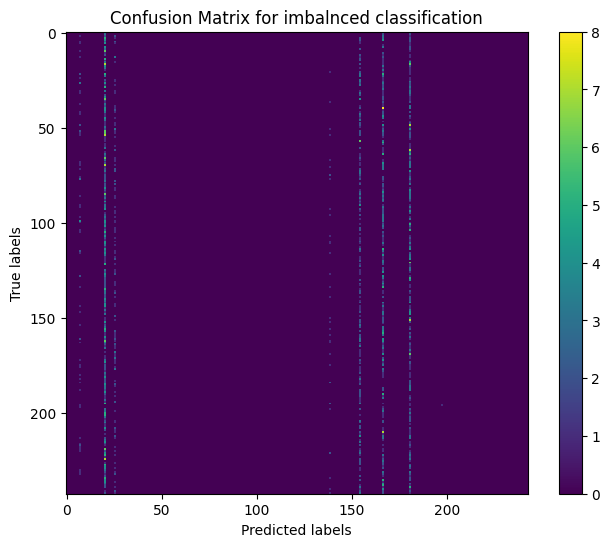

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight

df = pd.read_csv('/content/customers-10000 3.csv')

le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])

X = df[['no of customer', 'Founded']]
y = df['Country']

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train, y_train, sample_weight=class_weights[y_train])

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix(y_test, y_pred), interpolation='nearest')
plt.title('Confusion Matrix for imbalnced classification')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


Accuracy: 0.004
                                                     precision    recall  f1-score   support

                                        Afghanistan       0.00      0.00      0.00         4
                                            Albania       0.00      0.00      0.00         7
                                            Algeria       0.00      0.00      0.00         9
                                     American Samoa       0.20      0.08      0.11        13
                                            Andorra       0.00      0.00      0.00        12
                                             Angola       0.00      0.00      0.00         8
                                           Anguilla       0.00      0.00      0.00         8
       Antarctica (the territory South of 60 deg S)       0.00      0.00      0.00         2
                                Antigua and Barbuda       0.00      0.00      0.00         9
                                          Argentina  

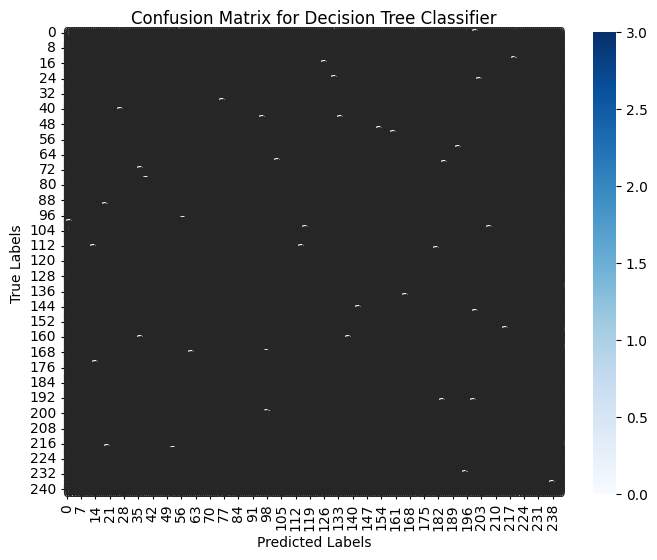

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

X = df[['no of customer', 'Founded']]
y = df['Country']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Accuracy: 0.0045
Precision: 0.0063
Recall: 0.0045
F1-score: 0.0050


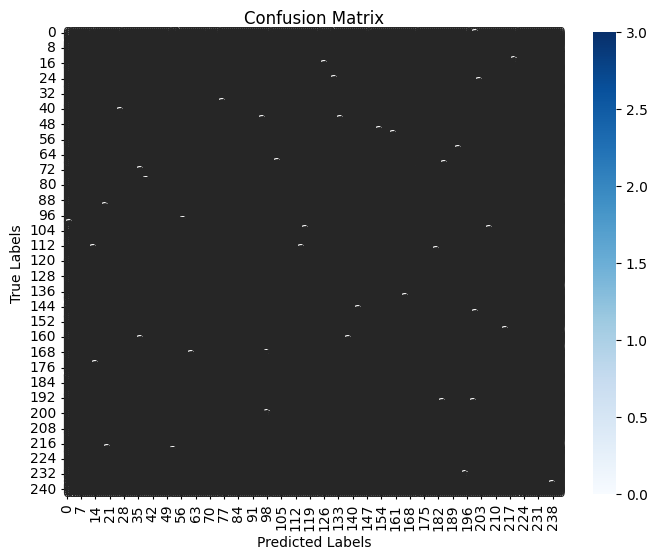

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
